# **The Client**

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.


---


***Cab_Data.csv*** – this file includes details of transaction for 2 cab companies

***Customer_ID.csv*** – this is a mapping table that contains a unique identifier which links the customer’s demographic details

***Transaction_ID.csv*** – this is a mapping table that contains transaction to customer mapping and payment mode

***City.csv*** – this file contains list of US cities, their population and number of cab users


---



## Tabular Data info for **Data Intake Report** below
  - Cab_Data.csv
  - Customer_ID.csv
  - Transaction_ID.csv
  - City.csv

In [11]:
import pandas as pd
import requests
import sys

# Use either url from github or custom path from colab
# cab_data_path = '/content/Cab_Data.csv'
# customerID_data_path = '/content/Customer_ID.csv'
# transactionID_data_path = '/content/Transaction_ID.csv'
# city_data_path = '/content/City.csv'

# Define URLs
cab_data_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/refs/heads/main/Cab_Data.csv'
customerID_data_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/refs/heads/main/Customer_ID.csv'
transactionID_data_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/refs/heads/main/Transaction_ID.csv'
city_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/refs/heads/main/City.csv'

# Load datasets from GitHub
cab_data = pd.read_csv(cab_data_url)
city_data = pd.read_csv(city_url)
customer_data = pd.read_csv(customerID_data_url)
transaction_data = pd.read_csv(transactionID_data_url)

# Helper function to get accurate file size by fetching actual content
def get_file_size(url):
    response = requests.get(url)
    size_in_bytes = len(response.content)
    size_in_mb = size_in_bytes / (1024**2)
    return f"{size_in_mb:.2f} MB"

# Construct datasets information dictionary
datasets_info = {
    "Dataset": ["Cab_Data", "City", "Customer_ID", "Transaction_ID"],
    "Total number of observations (rows)": [
        cab_data.shape[0],
        city_data.shape[0],
        customer_data.shape[0],
        transaction_data.shape[0],
    ],
    "Total number of features (columns)": [
        cab_data.shape[1],
        city_data.shape[1],
        customer_data.shape[1],
        transaction_data.shape[1],
    ],
    "Base format of the file": [".csv"] * 4,
    "Size of the data": [
        get_file_size(cab_data_url),
        get_file_size(city_url),
        get_file_size(customerID_data_url),
        get_file_size(transactionID_data_url),
    ],
    "Total number of files": [1] * 4,
}

# Convert to DataFrame for visualization or further processing
datasets_info_df = pd.DataFrame(datasets_info)
datasets_info_df



,Dataset,Total number of observations (rows),Total number of features (columns),Base format of the file,Size of the data,Total number of files
0,Cab_Data,359392,7,.csv,20.18 MB,1
1,City,20,3,.csv,0.00 MB,1
2,Customer_ID,49171,4,.csv,1.00 MB,1
3,Transaction_ID,440098,3,.csv,8.58 MB,1


## Info Gathering and Data Cleansing
- Done before we start hypothesis

In [2]:
"""LOAD REQUIRED LIBRARIES"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from URLs
cab_data_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/refs/heads/main/Cab_Data.csv'
customerID_data_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/refs/heads/main/Customer_ID.csv'
transactionID_data_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/refs/heads/main/Transaction_ID.csv'
city_url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/refs/heads/main/City.csv'

# Load datasets
cab_data = pd.read_csv(cab_data_url)
customer_data = pd.read_csv(customerID_data_url)
transaction_data = pd.read_csv(transactionID_data_url)
city_data = pd.read_csv(city_url)

cab_data.head(), customer_data.head(), transaction_data.head(), city_data.head()


(   Transaction ID  Date of Travel   Company        City  KM Travelled  \
 0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
 1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
 2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
 3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
 4        10000015           42372  Pink Cab  ATLANTA GA          8.73   
 
    Price Charged  Cost of Trip  
 0         370.95       313.635  
 1         358.52       334.854  
 2         125.20        97.632  
 3         377.40       351.602  
 4         114.62        97.776  ,
    Customer ID Gender  Age  Income (USD/Month)
 0        29290   Male   28               10813
 1        27703   Male   27                9237
 2        28712   Male   53               11242
 3        28020   Male   23               23327
 4        27182   Male   33                8536,
    Transaction ID  Customer ID Payment_Mode
 0        10000

In [3]:
# only checks for missing values and data types in each dataset
cab_data_info = cab_data.info(), cab_data.isnull().sum()
customer_data_info = customer_data.info(), customer_data.isnull().sum()
transaction_data_info = transaction_data.info(), transaction_data.isnull().sum()
city_data_info = city_data.info(), city_data.isnull().sum()

cab_data_info, customer_data_info, transaction_data_info, city_data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3),

((None,
  Transaction ID    0
  Date of Travel    0
  Company           0
  City              0
  KM Travelled      0
  Price Charged     0
  Cost of Trip      0
  dtype: int64),
 (None,
  Customer ID           0
  Gender                0
  Age                   0
  Income (USD/Month)    0
  dtype: int64),
 (None,
  Transaction ID    0
  Customer ID       0
  Payment_Mode      0
  dtype: int64),
 (None,
  City          0
  Population    0
  Users         0
  dtype: int64))

In [4]:
city_data['Population'] = city_data['Population'].replace({',': ''}, regex=True).astype(int)
city_data['Users'] = city_data['Users'].replace({',': ''}, regex=True).astype(int)

city_data.dtypes


,0
City,object
Population,int64
Users,int64


In [5]:
import datetime as dt

# runs if 'Date of Travel' is not already in datetime format
if not pd.api.types.is_datetime64_any_dtype(cab_data['Date of Travel']):
    cab_data['Date of Travel'] = cab_data['Date of Travel'].astype(int)

    def excel_date_to_datetime(excel_date):
        temp = dt.datetime(1899, 12, 30)  # Excel base date
        delta = dt.timedelta(days=excel_date)
        return temp + delta

    cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(excel_date_to_datetime)
else:
    print("Date of Travel is already in datetime format, skipping conversion")

cab_data[['Transaction ID', 'Date of Travel']]

,Transaction ID,Date of Travel
0,10000011,2016-01-08
1,10000012,2016-01-06
2,10000013,2016-01-02
3,10000014,2016-01-07
4,10000015,2016-01-03
...,...,...
359387,10440101,2018-01-08
359388,10440104,2018-01-04
359389,10440105,2018-01-05
359390,10440106,2018-01-05


In [6]:
# Merging the datasets to create a complete dataset
merged_data = pd.merge(cab_data, transaction_data, on='Transaction ID', how='inner')
merged_data = pd.merge(merged_data, customer_data, on='Customer ID', how='inner')
merged_data = pd.merge(merged_data, city_data, on='City', how='inner')

merged_data


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,814885,24701
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,418859,127001
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,418859,127001
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,418859,127001
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,418859,127001


In [8]:
# profit of each trip = subtraction of 'Cost of Trip' from 'Price Charged' in the merged_data dataset

merged_data['Profit'] = merged_data['Price Charged'] - merged_data['Cost of Trip']
merged_data[['Transaction ID', 'Price Charged', 'Cost of Trip', 'Profit']]


,Transaction ID,Price Charged,Cost of Trip,Profit
0,10000011,370.95,313.6350,57.3150
1,10000012,358.52,334.8540,23.6660
2,10000013,125.20,97.6320,27.5680
3,10000014,377.40,351.6020,25.7980
4,10000015,114.62,97.7760,16.8440
...,...,...,...,...
359387,10440101,69.24,63.3600,5.8800
359388,10440104,113.75,106.8480,6.9020
359389,10440105,437.07,349.6500,87.4200
359390,10440106,146.19,114.0480,32.1420


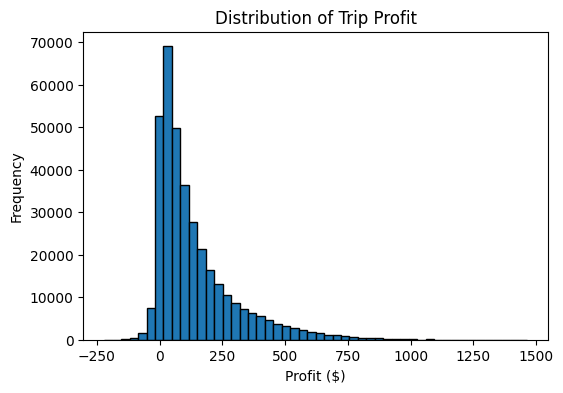

In [9]:
# shows the profit distribution and average profit by company
plt.figure(figsize=(6, 4))
plt.hist(merged_data['Profit'], bins=50, edgecolor='black')
plt.title('Distribution of Trip Profit')
plt.xlabel('Profit ($)')
plt.ylabel('Frequency')
plt.show()


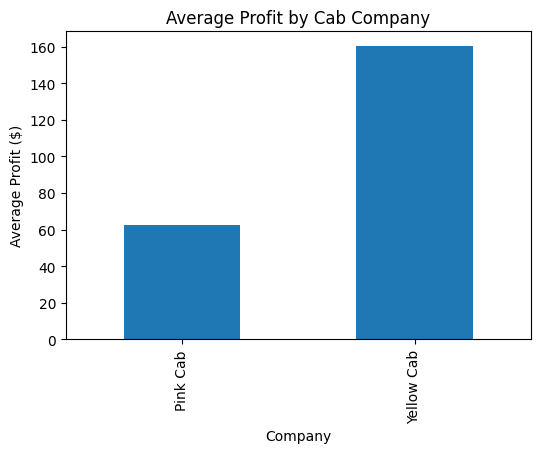

In [10]:
# average Profit by Company
plt.figure(figsize=(6, 4))
merged_data.groupby('Company')['Profit'].mean().plot(kind='bar')
plt.title('Average Profit by Cab Company')
plt.xlabel('Company')
plt.ylabel('Average Profit ($)')
plt.show()


## Hypothesis


### **Hypothesis 1** - Profitability by Trip Volume
- Null Hypothesis (H0): There is no relationship between the number of rides in a city and the average profit per ride for either company.
- Alternative Hypothesis (H1): Cities with a higher number of rides have a lower average profit per ride for both companies.

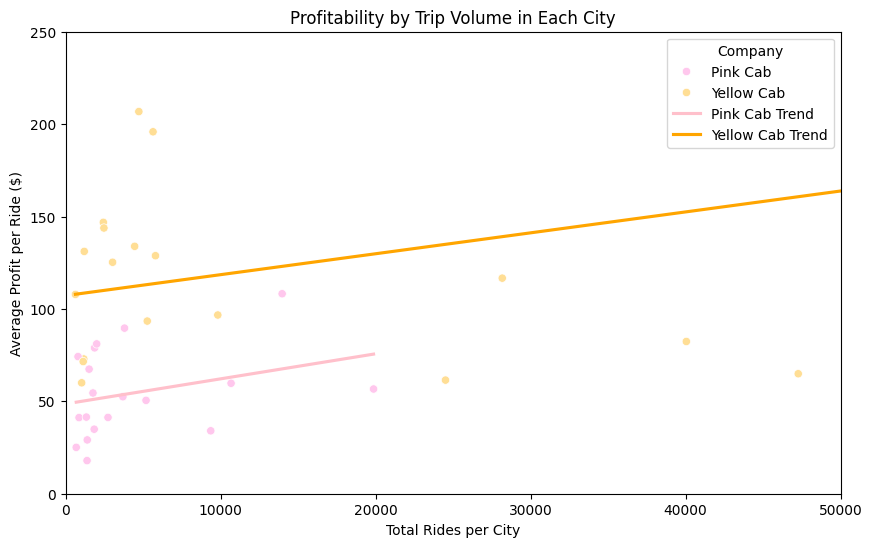

In [38]:
sns.set_palette(['#FFC7ED', '#FFDE95'])

# this calculates the number of rides and average profit per ride for each city and company
city_profitability = merged_data.groupby(['City', 'Company']).agg(
    total_rides=('Transaction ID', 'count'),
    avg_profit_per_ride=('Profit', 'mean')
).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=city_profitability, x='total_rides', y='avg_profit_per_ride', hue='Company')

sns.regplot(data=city_profitability[city_profitability['Company'] == 'Pink Cab'],
            x='total_rides', y='avg_profit_per_ride', scatter=False, color='pink', ci=None, label='Pink Cab Trend')
sns.regplot(data=city_profitability[city_profitability['Company'] == 'Yellow Cab'],
            x='total_rides', y='avg_profit_per_ride', scatter=False, color='orange', ci=None, label='Yellow Cab Trend')

plt.xlim(0, 50000)
plt.ylim(0, 250)

plt.title('Profitability by Trip Volume in Each City')
plt.xlabel('Total Rides per City')
plt.ylabel('Average Profit per Ride ($)')
plt.legend(title='Company')
plt.show()


### **Hypothesis 2** - Customer Age Impact on Number of Rides:
- Null Hypothesis (H0): There is no difference in the average number of rides taken by older customers compared to younger customers, regardless of the cab company.
- Alternative Hypothesis (H1): Older customers take more rides on average than younger customers, regardless of the cab company.

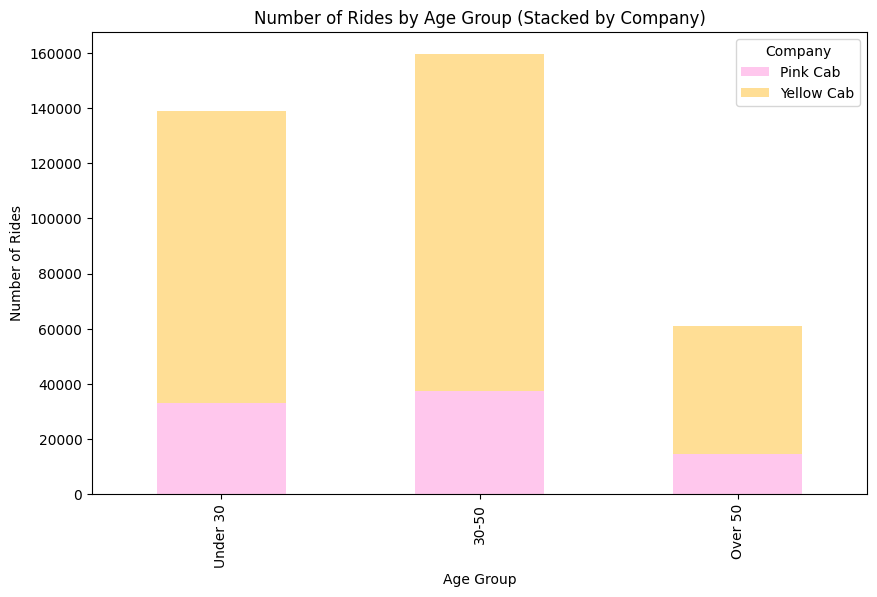

In [39]:
ride_counts_pivot = ride_counts.pivot(index='Age Group', columns='Company', values='Ride Count').fillna(0)

ride_counts_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Rides by Age Group (Stacked by Company)')
plt.xlabel('Age Group')
plt.ylabel('Number of Rides')
plt.legend(title='Company')
plt.show()


### **Hypothesis 3** - Ride Distribution Based on City Size
- Null Hypothesis (H0): There is no difference in the presence of Pink Cab and Yellow Cab across cities of different sizes.
- Alternative Hypothesis (H1): Pink Cab has a stronger presence in smaller cities, while Yellow Cab is more dominant in larger cities.

<ipython-input-40-69c556062549>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_size_distribution = merged_data.groupby(['City Size', 'Company']).size().reset_index(name='Total Rides')


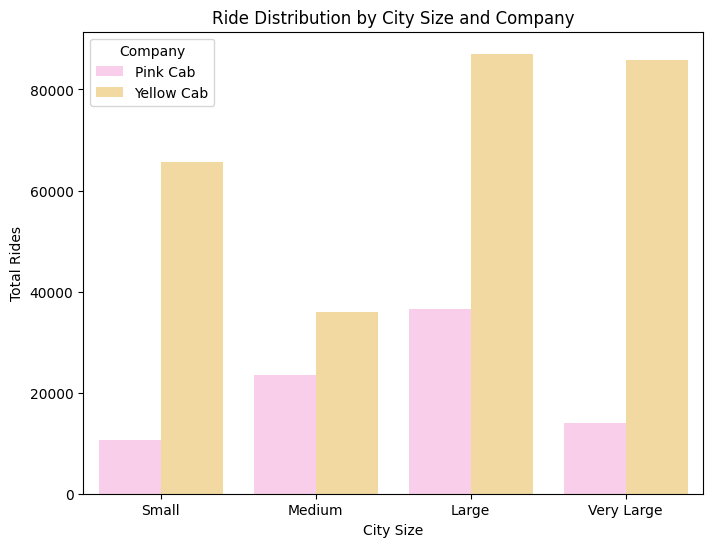

In [40]:
population_bins = [0, 500000, 1000000, 5000000, 10000000]  # Small, Medium, Large, Very Large
population_labels = ['Small', 'Medium', 'Large', 'Very Large']
merged_data['City Size'] = pd.cut(merged_data['Population'], bins=population_bins, labels=population_labels, right=False)

# calculates the number of rides per company in each city size category
city_size_distribution = merged_data.groupby(['City Size', 'Company']).size().reset_index(name='Total Rides')

plt.figure(figsize=(8, 6))
sns.barplot(data=city_size_distribution, x='City Size', y='Total Rides', hue='Company')
plt.title('Ride Distribution by City Size and Company')
plt.xlabel('City Size')
plt.ylabel('Total Rides')
plt.legend(title='Company')
plt.show()

### **Hypothesis 4** - City Population Density vs. Cab Usage:
- Null Hypothesis (H0): Cab usage density (rides per capita) does not vary with city population size for either company.
- Alternative Hypothesis (H1): Cab usage density is higher in more densely populated cities, indicating a stronger customer base in these areas for both companies.

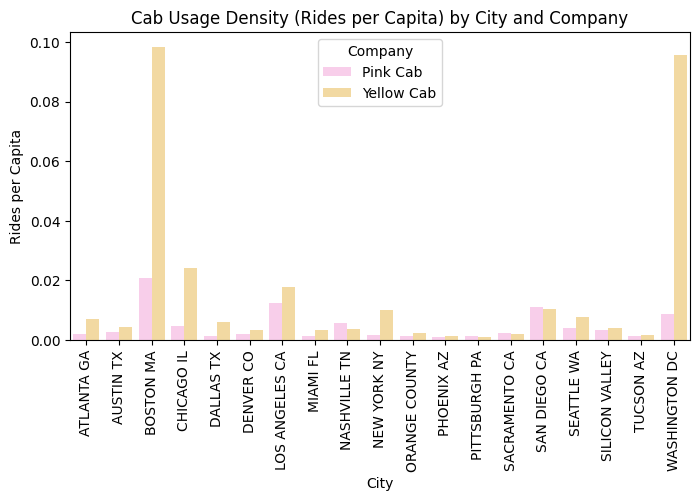

In [41]:
merged_data['Rides per Capita'] = merged_data.groupby(['City', 'Company'])['Transaction ID'].transform('count') / merged_data['Population']

density_usage = merged_data.groupby(['City', 'Company']).agg(
    rides_per_capita=('Rides per Capita', 'mean')
).reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=density_usage, x='City', y='rides_per_capita', hue='Company')
plt.title('Cab Usage Density (Rides per Capita) by City and Company')
plt.xlabel('City')
plt.ylabel('Rides per Capita')
plt.xticks(rotation=90)
plt.legend(title='Company')
plt.show()


### **Hypothesis 5** - Top City for Repeat Customers by Company:
- Null Hypothesis (H0): There is no difference in the concentration of repeat customers between Yellow Cab and Pink Cab in any specific city.
- Alternative Hypothesis (H1): Yellow Cab has a higher concentration of repeat customers in certain cities compared to Pink Cab.

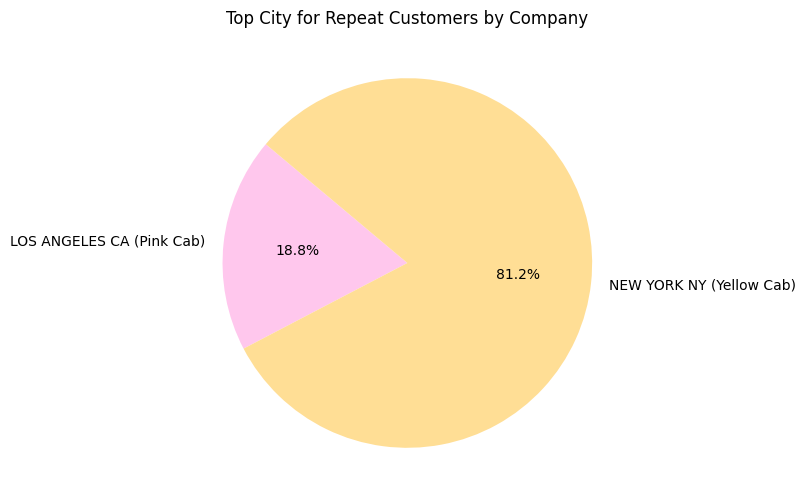

In [43]:
top_repeat_cities_labels = [f"{row['City']} ({row['Company']})" for _, row in top_repeat_cities.iterrows()]
top_repeat_customers_counts = top_repeat_cities['Repeat Customers']

plt.figure(figsize=(8, 6))
plt.pie(top_repeat_customers_counts, labels=top_repeat_cities_labels, autopct='%1.1f%%', startangle=140)
plt.title('Top City for Repeat Customers by Company')
plt.show()


## Hypothesis Results
1. **Profitability by Trip Volume:**

  Result: Not supported. The data did not show an inverse relationship between ride volume and profit per ride; in fact, both companies showed stable or slightly increased profitability with higher ride counts.

2. **Customer Age Impact on Ride Frequency:**

  Result: Not supported. Middle-aged customers (age 30-50) took the most rides, while the "Over 50" group took the fewest, contradicting the initial hypothesis.

3. **Ride Distribution Based on City Size:**

  Result: Not supported. Yellow Cab was dominant across all city sizes, with no indication that Pink Cab had a stronger presence in smaller cities.

4. **City Population Density vs. Cab Usage:**

  Result: Partially supported. Some densely populated cities showed high usage density, but this was inconsistent across all cities, suggesting other factors beyond population size influence cab demand.

5. **Top City for Repeat Customers by Company:**

  Result: Supported. The data showed a significantly higher concentration of repeat customers for Yellow Cab in New York City compared to Pink Cab’s top city (Los Angeles).

## **Recommendations Based on Analysis**
After analyzing the data and testing my hypotheses, here are some recommendations I found for both Yellow Cab and Pink Cab companies to improve upon:

1. **Target Middle-Aged Customers to Boost Ride Numbers**
  - Finding: Customers aged 30-50 are taking the most rides, while those over 50 are taking the least

2. **Explore Different Opportunities in High-Demand Cities**
  - Finding: Certain cities like Boston, MA and Washington, DC have higher cab usage density, but this doesn't always match up with population size

3. **Differentiate Services to Stand Out**
  - Finding: Yellow Cab dominates in ride numbers across all city sizes, and Pink Cab doesn't have a stronger presence in smaller cities as initially thought

4. **Increase Customer Loyalty and Repeat Business**
  - Finding: Yellow Cab has more repeat customers, especially in cities like New York, NY

